In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve, precision_recall_curve)

# Set style for better plots
plt.style.use('seaborn-v0_8')

In [3]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

print("Dataset Shape:", X.shape)
print("\nTarget Distribution:")
print(df['diagnosis'].value_counts())
print("\nTarget meanings: 0 = Malignant, 1 = Benign")
print("\nFirst 5 rows:")
print(df.head())

# Basic statistics
print("\nDataset Info:")
print(df.describe())

Dataset Shape: (569, 30)

Target Distribution:
diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64

Target meanings: 0 = Malignant, 1 = Benign

First 5 rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Test set class distribution: {np.bincount(y_test)}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed!")
print(f"Mean of scaled training features: {np.mean(X_train_scaled):.2f}")
print(f"Std of scaled training features: {np.std(X_train_scaled):.2f}")

Training set size: 398
Test set size: 171
Training set class distribution: [148 250]
Test set class distribution: [ 64 107]

Feature scaling completed!
Mean of scaled training features: -0.00
Std of scaled training features: 1.00


In [5]:
# Create and train the logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

print("Logistic Regression Model Trained!")
print(f"Training accuracy: {logreg.score(X_train_scaled, y_train):.4f}")
print(f"Test accuracy: {logreg.score(X_test_scaled, y_test):.4f}")

# Display model coefficients
print("\nTop 10 most important features:")
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': logreg.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print(feature_importance.head(10))

Logistic Regression Model Trained!
Training accuracy: 0.9874
Test accuracy: 0.9883

Top 10 most important features:
                 feature  coefficient
21         worst texture    -1.226329
27  worst concave points    -0.996807
23            worst area    -0.954956
20          worst radius    -0.941060
13            area error    -0.937493
10          radius error    -0.886370
28        worst symmetry    -0.869444
26       worst concavity    -0.785989
24      worst smoothness    -0.748971
22       worst perimeter    -0.731042



=== Model Evaluation Metrics ===
Precision: 0.9907
Recall: 0.9907
ROC-AUC: 0.9981
Accuracy: 0.9883

=== Detailed Classification Report ===
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



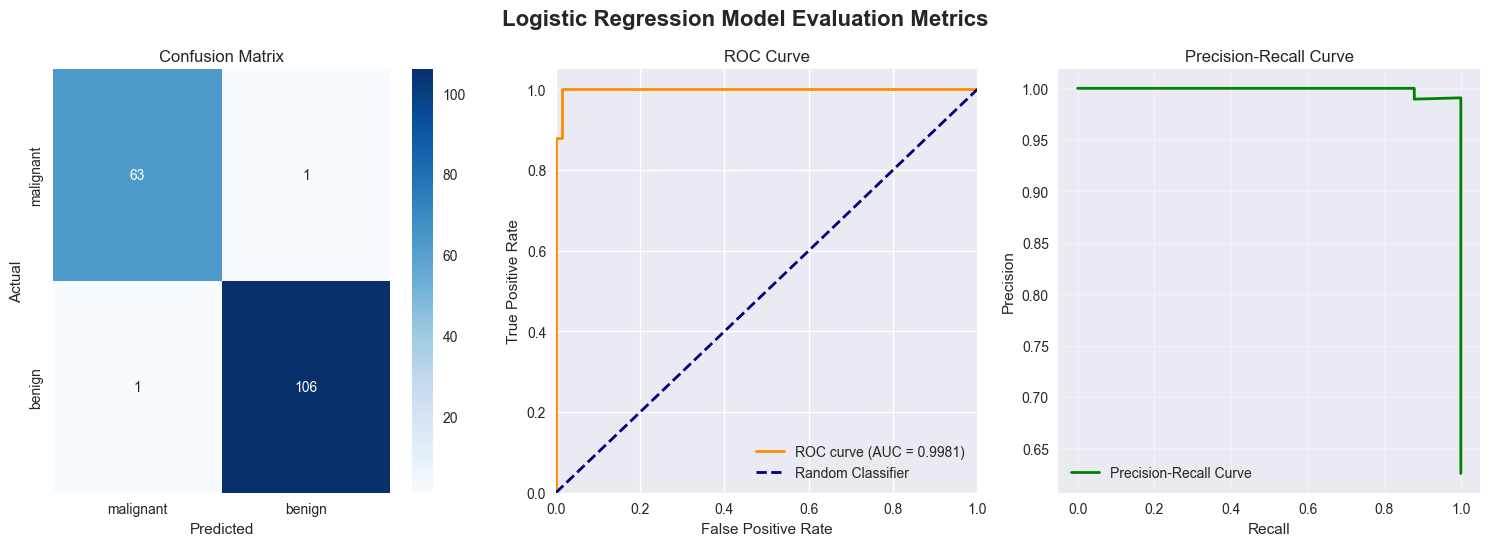

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 10))
plt.suptitle('Logistic Regression Model Evaluation Metrics', fontsize=16, fontweight='bold')

# Plot 1: Confusion Matrix
plt.subplot(2, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n=== Model Evaluation Metrics ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Accuracy: {logreg.score(X_test_scaled, y_test):.4f}")

# Detailed classification report
print("\n=== Detailed Classification Report ===")
print(classification_report(y_test, y_pred, target_names=target_names))

# ROC Curve
plt.subplot(2, 3, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(2, 3, 3)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall_curve, precision_curve, color='green', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust for suptitle
plt.show()

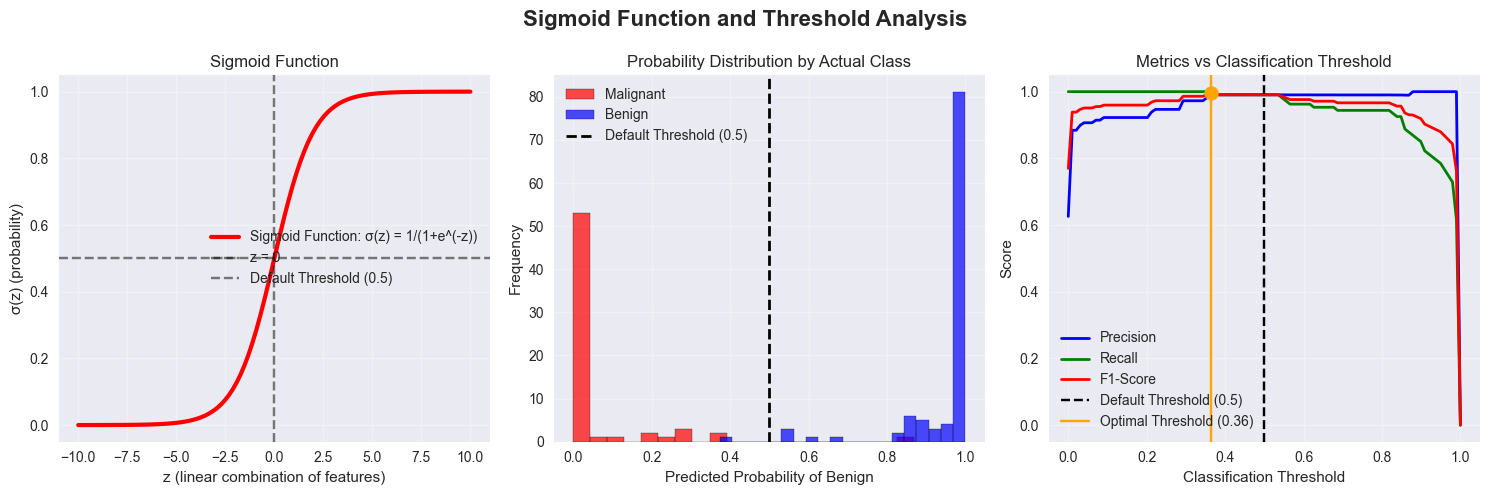


Performance with Different Thresholds
Threshold  Precision  Recall     Accuracy   F1-Score  
----------------------------------------------------------------------
0.20       0.9224     1.0000     0.9474     0.9596      
0.30       0.9727     1.0000     0.9825     0.9862      
0.40       0.9907     0.9907     0.9883     0.9907      
0.50       0.9907     0.9907     0.9883     0.9907     ●
0.60       0.9904     0.9626     0.9708     0.9763      
0.70       0.9902     0.9439     0.9591     0.9665      
0.80       0.9902     0.9439     0.9591     0.9665      
0.36       0.9907     1.0000     0.9942     0.9953     ★
★ Optimal threshold | ● Default threshold

Optimal threshold analysis:
• Optimal threshold: 0.3636
• Maximum F1-score: 0.9953
• Precision at optimal threshold: 0.9907
• Recall at optimal threshold: 1.0000

Threshold Selection Business Context
When to use different thresholds:
• High threshold (>0.7): When false positives are costly (e.g., unnecessary treatments)
• Low threshol

In [15]:
from sklearn.metrics import accuracy_score, f1_score  # Add missing imports

# Visualize the sigmoid function
plt.figure(figsize=(15, 5))
plt.suptitle('Sigmoid Function and Threshold Analysis', fontsize=16, fontweight='bold')

# Plot 1: Sigmoid Function
plt.subplot(1, 3, 1)
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid, color='red', lw=3, label='Sigmoid Function: σ(z) = 1/(1+e^(-z))')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5, label='z = 0')
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5, label='Default Threshold (0.5)')
plt.xlabel('z (linear combination of features)')
plt.ylabel('σ(z) (probability)')
plt.title('Sigmoid Function')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Probability Distribution
plt.subplot(1, 3, 2)
plt.hist(y_pred_proba[y_test == 0], alpha=0.7, label='Malignant', bins=20, color='red', edgecolor='black')
plt.hist(y_pred_proba[y_test == 1], alpha=0.7, label='Benign', bins=20, color='blue', edgecolor='black')
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Default Threshold (0.5)')
plt.xlabel('Predicted Probability of Benign')
plt.ylabel('Frequency')
plt.title('Probability Distribution by Actual Class')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Threshold Tuning
plt.subplot(1, 3, 3)
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    precision_val = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall_val = recall_score(y_test, y_pred_thresh)
    precisions.append(precision_val)
    recalls.append(recall_val)
    
    # Calculate F1-score safely
    if precision_val + recall_val > 0:
        f1_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)
    else:
        f1_val = 0
    f1_scores.append(f1_val)

plt.plot(thresholds, precisions, label='Precision', lw=2, color='blue')
plt.plot(thresholds, recalls, label='Recall', lw=2, color='green')
plt.plot(thresholds, f1_scores, label='F1-Score', lw=2, color='red', linestyle='-')
plt.axvline(x=0.5, color='black', linestyle='--', label='Default Threshold (0.5)')

# Mark optimal threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_f1 = max(f1_scores)
plt.axvline(x=optimal_threshold, color='orange', linestyle='-', 
            label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.scatter(optimal_threshold, optimal_f1, color='orange', s=100, zorder=5)

plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.title('Metrics vs Classification Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# Compare performance with different thresholds
print("\n" + "="*70)
print("Performance with Different Thresholds")
print("="*70)
print(f"{'Threshold':<10} {'Precision':<10} {'Recall':<10} {'Accuracy':<10} {'F1-Score':<10}")
print("-"*70)

for threshold in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, optimal_threshold]:
    y_pred_opt = (y_pred_proba >= threshold).astype(int)
    precision_opt = precision_score(y_test, y_pred_opt, zero_division=0)
    recall_opt = recall_score(y_test, y_pred_opt)
    accuracy_opt = accuracy_score(y_test, y_pred_opt)
    f1_opt = f1_score(y_test, y_pred_opt)  # Now this will work
    
    # Highlight optimal threshold
    if abs(threshold - optimal_threshold) < 0.01:  # Account for floating point precision
        marker = "★"
    elif threshold == 0.5:
        marker = "●"
    else:
        marker = " "
    
    print(f"{threshold:<10.2f} {precision_opt:<10.4f} {recall_opt:<10.4f} {accuracy_opt:<10.4f} {f1_opt:<10.4f} {marker}")

print("="*70)
print("★ Optimal threshold | ● Default threshold")

# Additional analysis
print(f"\nOptimal threshold analysis:")
print(f"• Optimal threshold: {optimal_threshold:.4f}")
print(f"• Maximum F1-score: {optimal_f1:.4f}")
print(f"• Precision at optimal threshold: {precision_score(y_test, (y_pred_proba >= optimal_threshold).astype(int), zero_division=0):.4f}")
print(f"• Recall at optimal threshold: {recall_score(y_test, (y_pred_proba >= optimal_threshold).astype(int)):.4f}")

# Business context explanation
print("\n" + "="*70)
print("Threshold Selection Business Context")
print("="*70)
print("When to use different thresholds:")
print("• High threshold (>0.7): When false positives are costly (e.g., unnecessary treatments)")
print("• Low threshold (<0.3): When false negatives are dangerous (e.g., missed cancer diagnoses)")
print("• Default threshold (0.5): Balanced approach for general use")
print(f"• Optimal threshold ({optimal_threshold:.2f}): Best balance for this specific dataset")

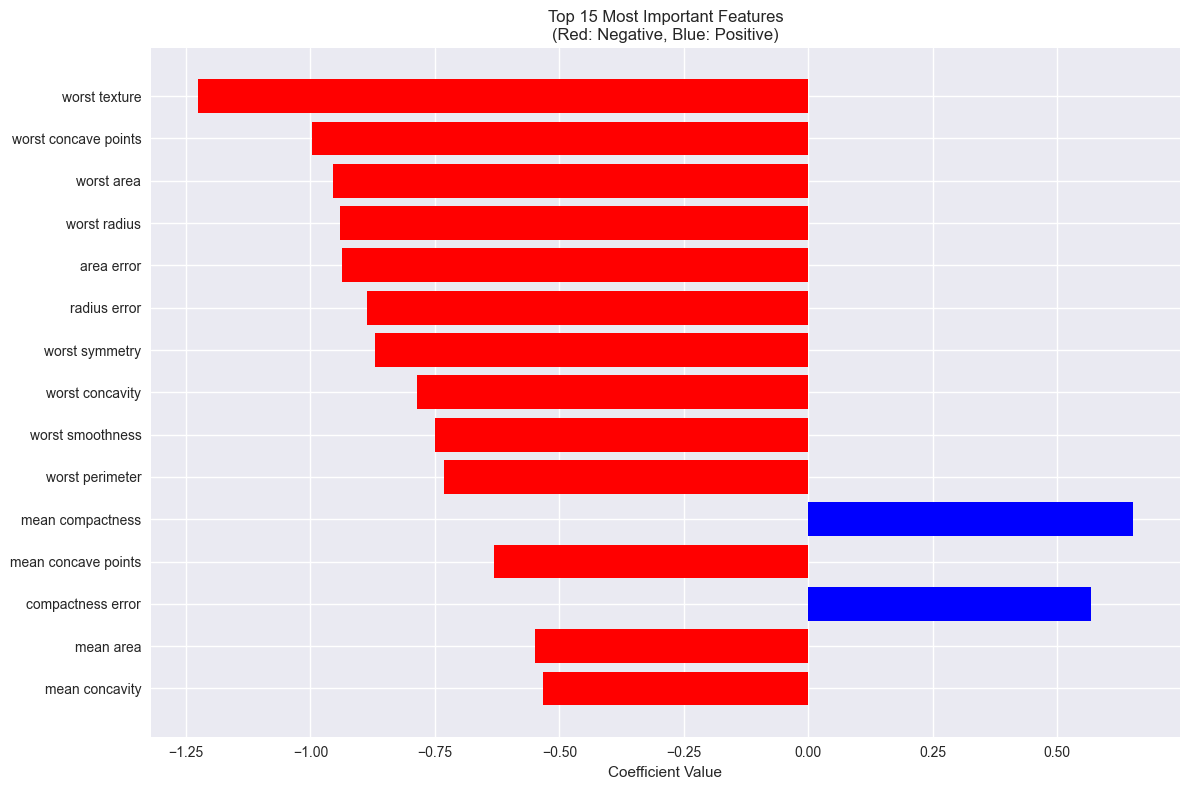


=== Model Interpretation ===
Positive coefficients increase probability of Benign diagnosis
Negative coefficients increase probability of Malignant diagnosis

Most important feature: worst texture
Coefficient: -1.2263


In [8]:
# Feature importance visualization
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['red' if x < 0 else 'blue' for x in top_features['coefficient']]

plt.barh(range(len(top_features)), top_features['coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Most Important Features\n(Red: Negative, Blue: Positive)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Interpretation
print("\n=== Model Interpretation ===")
print("Positive coefficients increase probability of Benign diagnosis")
print("Negative coefficients increase probability of Malignant diagnosis")
print(f"\nMost important feature: {feature_importance.iloc[0]['feature']}")
print(f"Coefficient: {feature_importance.iloc[0]['coefficient']:.4f}")